In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Avanthi\New folder\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
x = df.iloc[:,3:].values  #convert to array format
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [7]:
x_scaled = pd.DataFrame(x_scaled, columns = df.columns[3:])

In [8]:
x_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# Building cluster basis K Means approach

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []   # wcss--> within cluster sum of square value
for i in range(1,15):
    km = KMeans(n_clusters = i, random_state = 1)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

In [11]:
wcss

[399.99999999999994,
 269.14250704479224,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.15135706793106,
 33.85410621736368,
 29.07617685124427,
 26.230634148456048,
 23.37409986508554,
 21.2609650798953,
 18.86230750576736]

In [12]:
a = list(range(1,15))

<Axes: >

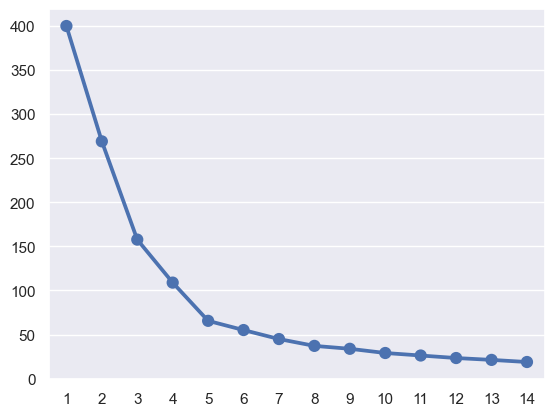

In [13]:
sns.pointplot(x=a, y=wcss)

In [14]:
km = KMeans(n_clusters = 5, random_state = 1)
km.fit(x_scaled)
labels = km.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
silhouette_score(x_scaled, labels, random_state = 1)

0.5546571631111091

In [17]:
combined = pd.concat([df, pd.DataFrame(labels)], axis=1)
combined

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [18]:
combined.to_csv('final_output.csv')

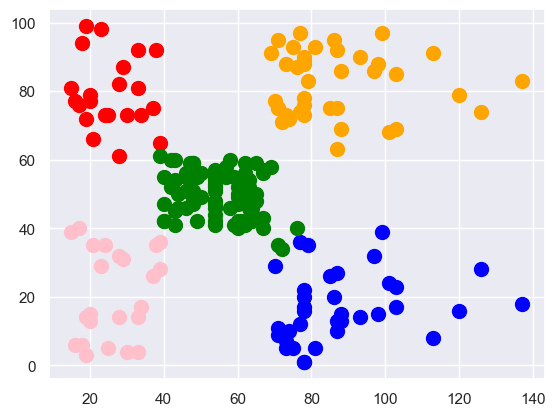

In [19]:
plt.scatter(x[labels==0,0], x[labels==0,1], s=100, c = 'red', label='Cluster1')
plt.scatter(x[labels==1,0], x[labels==1,1], s=100, c = 'blue', label='Cluster2')
plt.scatter(x[labels==2,0], x[labels==2,1], s=100, c = 'green', label='Cluster3')
plt.scatter(x[labels==3,0], x[labels==3,1], s=100, c = 'orange', label='Cluster4')
plt.scatter(x[labels==4,0], x[labels==4,1], s=100, c = 'pink', label='Cluster5')


# Hierarchical Cluster

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
link_method = linkage(x_scaled)
link_method

array([[4.80000000e+01, 4.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.56000000e+02, 1.58000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+02, 1.74000000e+02, 3.81694292e-02, 2.00000000e+00],
       [6.30000000e+01, 2.01000000e+02, 3.81694292e-02, 3.00000000e+00],
       [5.10000000e+01, 5.30000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.01000000e+02, 1.09000000e+02, 3.81694292e-02, 2.00000000e+00],
       [9.20000000e+01, 9.90000000e+01, 3.81694292e-02, 2.00000000e+00],
       [9.80000000e+01, 1.05000000e+02, 3.81694292e-02, 2.00000000e+00],
       [9.40000000e+01, 2.09000000e+02, 3.81694292e-02, 3.00000000e+00],
       [1.07000000e+02, 1.13000000e+02, 3.81694292e-02, 2.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.50000000e+02, 1.54000000e+02, 3.88215607e

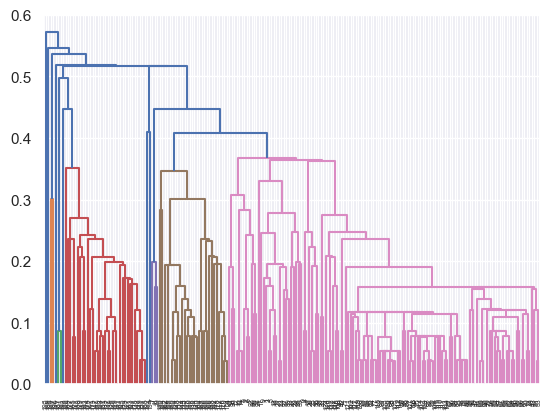

In [23]:
dend= dendrogram(link_method,p=30)

In [25]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters= fcluster(link_method, 5, criterion='maxclust')

In [30]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1,
       5, 4], dtype=int32)